In [1]:
import sys
print(sys.executable)

/home/hani/anaconda3/envs/BigData024/bin/python


In [2]:
!pip install findspark

In [48]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("LearnSparkSQL").getOrCreate()

data = [ 
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]

columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()

25/10/28 19:35:47 WARN Utils: Your hostname, hani-HP-240-G8-Notebook-PC resolves to a loopback address: 127.0.1.1; using 192.168.1.5 instead (on interface wlo1)
25/10/28 19:35:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/28 19:35:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
                                                                                

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



In [6]:
print("Total Gaji Karyawan Berdasarkan Jenis Kelamin dan Usia")

spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

Total Gaji Karyawan Berdasarkan Jenis Kelamin dan Usia
+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



In [8]:
print("Rata-rata Gaji Karyawan Per Departemen")

spark.sql('''
SELECT DeptId, AVG(Salary) as AVGSalary
FROM employees
GROUP BY DeptId
''').show()

Rata-rata Gaji Karyawan Per Departemen


[Stage 19:>                                                         (0 + 4) / 4]

+------+---------+
|DeptId|AVGSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+



In [29]:
print("Karyawan yang Memiliki Gaji di Atas Rata-rata untuk Masing-masing Gender")

spark.sql('''
SELECT e.* 
FROM employees e, (
    SELECT Gender, AVG(Salary) AS AvgSalary
    FROM employees
    GROUP BY Gender
) g 
WHERE e.Gender = g.Gender AND e.Salary > g.AvgSalary
''').show()

Karyawan yang Memiliki Gaji di Atas Rata-rata untuk Masing-masing Gender
+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
+-----+---+------+------+------+



In [34]:
print("Ranking Karyawan Berdasarkan Gaji dalam Tiap Departemen")

spark.sql('''
SELECT *, 
RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees
''').show()

Ranking Karyawan Berdasarkan Gaji dalam Tiap Departemen
+-----+---+------+------+------+----+
| Name|Age|Gender|Salary|DeptId|Rank|
+-----+---+------+------+------+----+
|James| 34|     M|  3000|     1|   1|
|  Lee| 23|     M|  2700|     1|   2|
| Anna| 28|     F|  4100|     2|   1|
+-----+---+------+------+------+----+



In [38]:
print("Top 3 Karyawan dalam Kelompok Usia Tertentu")

spark.sql('''
SELECT Name, Age, Salary, 
ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as Rank
FROM employees
''').show()

Top 3 Karyawan dalam Kelompok Usia Tertentu
+-----+---+------+----+
| Name|Age|Salary|Rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [39]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

25/10/25 11:43:20 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
[Stage 68:=========>        (2 + 2) / 4][Stage 69:>                 (0 + 2) / 4]

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [46]:
print("Rata-rata Gaji per Departemen dan Ranking Tiap Karyawan dalam Departemen Berdasarkan Gaji")

spark.sql('''
SELECT e.Name, e.Age, d.DeptName, e.Salary,
AVG(e.Salary) OVER (PARTITION BY e.DeptId) AS AvgSalary,
RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS Rank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

Rata-rata Gaji per Departemen dan Ranking Tiap Karyawan dalam Departemen Berdasarkan Gaji


[Stage 76:>                                                         (0 + 4) / 4]

+-----+---+---------+------+---------+----+
| Name|Age| DeptName|Salary|AvgSalary|Rank|
+-----+---+---------+------+---------+----+
|James| 34|       HR|  3000|   2850.0|   1|
|  Lee| 23|       HR|  2700|   2850.0|   2|
| Anna| 28|Marketing|  4100|   4100.0|   1|
+-----+---+---------+------+---------+----+



In [47]:
print("Tren Gaji Berdasarkan Usia di Setiap Departement dengan Window Function")

spark.sql('''
SELECT e.Name, e.Age, d.DeptName, e.Salary,
RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Age) AS AgeRank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, e.Age
''').show()

Tren Gaji Berdasarkan Usia di Setiap Departement dengan Window Function
+-----+---+---------+------+-------+
| Name|Age| DeptName|Salary|AgeRank|
+-----+---+---------+------+-------+
|  Lee| 23|       HR|  2700|      1|
|James| 34|       HR|  3000|      2|
| Anna| 28|Marketing|  4100|      1|
+-----+---+---------+------+-------+



In [48]:
print("Tren Gaji Berdasarkan Usia di Setiap Departemen dengan Window Function")

spark.sql('''
SELECT 
    e.Name,
    e.Age,
    d.DeptName,
    e.Salary,
    LAG(e.Salary) OVER (PARTITION BY e.DeptId ORDER BY e.Age) AS PrevSalary,
    LEAD(e.Salary) OVER (PARTITION BY e.DeptId ORDER BY e.Age) AS NextSalary,
    (e.Salary - LAG(e.Salary) OVER (PARTITION BY e.DeptId ORDER BY e.Age)) AS SalaryChange
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, e.Age
''').show()

Tren Gaji Berdasarkan Usia di Setiap Departemen dengan Window Function
+-----+---+---------+------+----------+----------+------------+
| Name|Age| DeptName|Salary|PrevSalary|NextSalary|SalaryChange|
+-----+---+---------+------+----------+----------+------------+
|  Lee| 23|       HR|  2700|      NULL|      3000|        NULL|
|James| 34|       HR|  3000|      2700|      NULL|         300|
| Anna| 28|Marketing|  4100|      NULL|      NULL|        NULL|
+-----+---+---------+------+----------+----------+------------+



In [51]:
!pip install matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 4.2 MB/s  0:00:02 eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 2.8 MB/s  0:00:018.1 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.3 MB/s  0:00:00m 6.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 6.0 MB/s  0:00:01m 8.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib] 6/7 [matplotlib]ourpy]


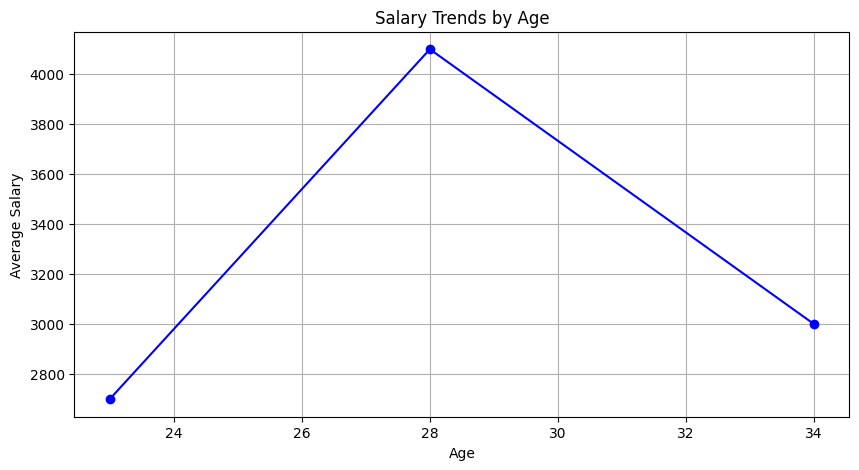

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o', color='blue')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

In [2]:
import os
print(os.environ.get('JAVA_HOME'))

/home/hani/anaconda3/envs/BigData024


In [4]:
import findspark
findspark.init('/home/hani/Downloads/spark-3.5.6-bin-hadoop3')

In [3]:
!echo $JAVA_HOME
!java -version

/home/hani/anaconda3/envs/BigData024
openjdk version "21.0.6" 2025-01-21
OpenJDK Runtime Environment JBR-21.0.6+9-895.97-nomod (build 21.0.6+9-b895.97)
OpenJDK 64-Bit Server VM JBR-21.0.6+9-895.97-nomod (build 21.0.6+9-b895.97, mixed mode, sharing)


In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Homework').getOrCreate()

25/10/28 19:36:16 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [6]:
# Data untuk Homework
employees = spark.createDataFrame([
    ('Paul', 25, 'M', 3700, 1),
    ('Bob', 31, 'M', 3500, 2),
    ('Anne', 28, 'F', 3800, 3),
    ('Joe', 26, 'M', 3500, 3),
    ('Starla', 26, 'F', 3800, 3),
    ('John', 30, 'M', 3600, 1),
    ('Selly', 30, 'F', 3300, 2),
    ('Tom', 25, 'M', 3800, 3),
    ('Lany', 30, 'F', 3900, 3),
    ('Jack', 28, 'M', 4200, 2),
    ('Lady', 31, 'F', 3600, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing'),
    (3, 'IT')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B'),
    (3, 'Project C')
], ['DeptId', 'ProjectName'])


employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

Homework No.1
Spark SQL untuk menghitung total gaji dan jumlah karyawan per departemen



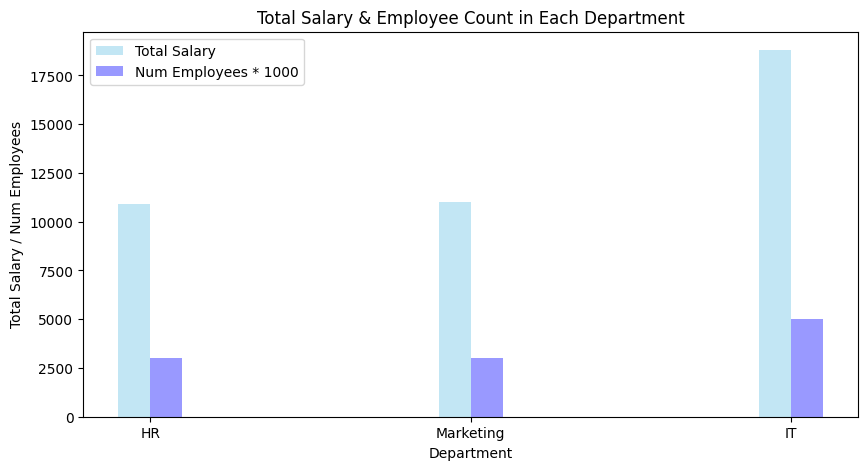

In [168]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("Homework No.1")
print("Spark SQL untuk menghitung total gaji dan jumlah karyawan per departemen\n")

dept_stats = spark.sql('''
SELECT d.DeptName, 
    COUNT(e.Name) AS NumEmployees,
    SUM(e.Salary) AS TotalSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''').toPandas()

# Data
departments = dept_stats['DeptName']
totalsalary = dept_stats['TotalSalary']
numemployees = dept_stats['NumEmployees']

x = np.arange(len(departments))
width = 0.1

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, totalsalary, width, color='skyblue', alpha=0.5, label='Total Salary')
plt.bar(x + width/2, numemployees*1000, width, color='blue', alpha=0.4, label='Num Employees * 1000')
plt.xlabel('Department')
plt.ylabel('Total Salary / Num Employees')
plt.xticks(x, departments)
plt.legend()
plt.title('Total Salary & Employee Count in Each Department')
plt.show()

Homework No.2
Spark SQL untuk menghitung rata-rata gaji perkelompok usia, lalu filter karyawan di atas rata-rata

Tabel Karyawan dengan Gaji di Atas Rata-rata per Usia:
+------+---+------+---------+
|  Name|Age|Salary|AvgSalary|
+------+---+------+---------+
|   Tom| 25|  3800|   3750.0|
|Starla| 26|  3800|   3650.0|
|  Jack| 28|  4200|   4000.0|
|  Lany| 30|  3900|   3600.0|
|  Lady| 31|  3600|   3550.0|
+------+---+------+---------+




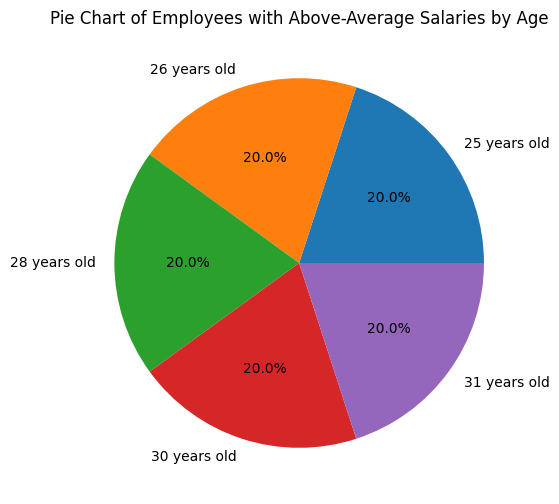

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

print("Homework No.2")
print("Spark SQL untuk menghitung rata-rata gaji perkelompok usia, lalu filter karyawan di atas rata-rata\n")

# Query view sementara untuk menghitung rata-rata gaji karyawan per usia 
above_avg = spark.sql('''
WITH SalaryWithAvg AS (
    SELECT Name, Age, Salary,
           AVG(Salary) OVER (PARTITION BY Age) AS AvgSalary
    FROM employees
)
SELECT *
FROM SalaryWithAvg
WHERE Salary > AvgSalary
ORDER BY Age, Name
''')
# Menampilkan data karyawan dengan gaji di atas rata-rata usianya
print("Tabel Karyawan dengan Gaji di Atas Rata-rata per Usia:")
above_avg.show()
print()

# Convert data ke Pandas
convert_toPandas = above_avg.toPandas()

# Menghitung jumlah karyawan per usia (Age)
age_count = convert_toPandas.groupby('Age')['Name'].count()
age_count.index = [f"{age} years old" for age in age_count.index]

# Desain PieChart
age_count.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Pie Chart of Employees with Above-Average Salaries by Age')
plt.ylabel('')
plt.show()

Homework No.3
Analisis dataset menggunakan SQL functions, seperti SUM(), AVG(), COUNT(), dan JOIN,
disertai dengan visualisasi yang menarik

Stores ===========================


+-------+-------------+----------+
|StoreId|    StoreName|      City|
+-------+-------------+----------+
|      1|   Java House|Yogyakarta|
|      2|Coffee Corner|  Magelang|
+-------+-------------+----------+

Items ================================
+------+-----------+-----------+-----+
|ItemId|   ItemName|   Category|Price|
+------+-----------+-----------+-----+
|     1|   Espresso| Hot Coffee|20000|
|     2|      Latte| Hot Coffee|25000|
|     3| Cappuccino| Hot Coffee|25000|
|     4|  Cold Brew|Iced Coffee|30000|
|     5|      Mocha| Hot Coffee|27000|
|     6| Iced Latte|Iced Coffee|28000|
|     7|  Americano| Hot Coffee|22000|
|     8|Frappuccino|Iced Coffee|35000|
+------+-----------+-----------+-----+

Sales =====================================
+------+-------+------+--------+----------+
|SaleId|StoreId|ItemId|Quantity|  SaleDate|
+------+-------+------+--------+----------+
|     1|      1|     3|       1|2025-01-01|
|     2|      1|     1|       5|2025-01-01|
|     3|      2| 

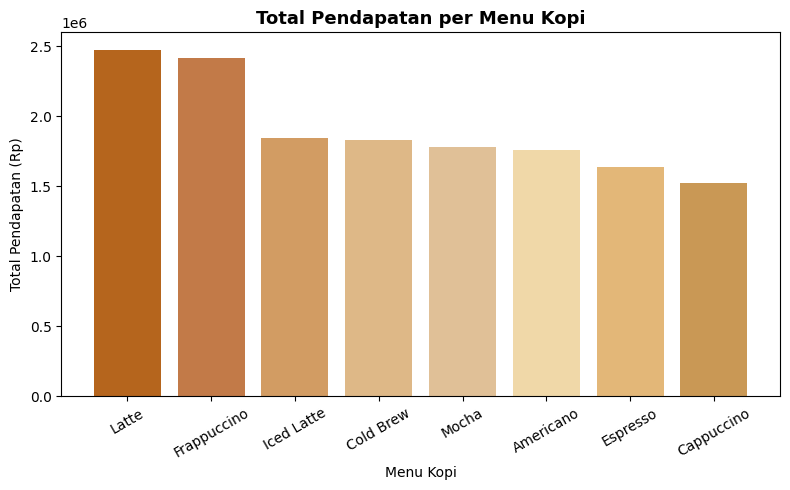

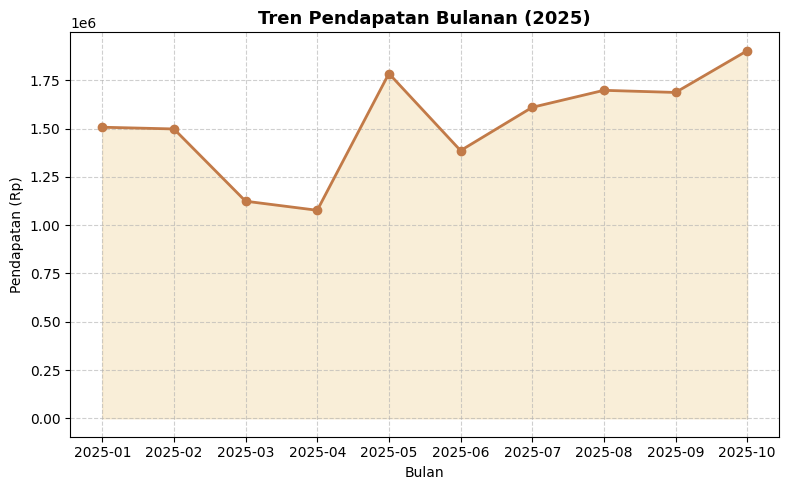

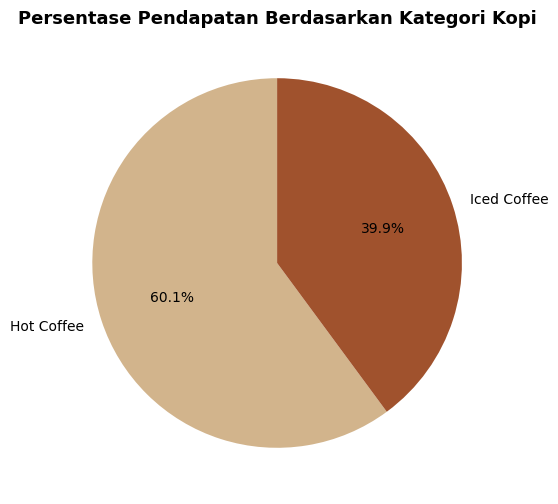

In [47]:
from pyspark.sql import SparkSession
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd

print("Homework No.3")
print("Analisis dataset menggunakan SQL functions, seperti SUM(), AVG(), COUNT(), dan JOIN,")
print("disertai dengan visualisasi yang menarik\n")

# Membuat database penjualan kopi
spark = SparkSession.builder.appName("CoffeeDataset").getOrCreate()

# Stores
stores_data = [
    (1, 'Java House', 'Yogyakarta'),
    (2, 'Coffee Corner', 'Magelang')
]

stores = spark.createDataFrame(stores_data, ['StoreId', 'StoreName', 'City'])
stores.createOrReplaceTempView('stores')

# Item: Menu Kopi
items_data = [
    (1, 'Espresso', 'Hot Coffee', 20000),
    (2, 'Latte', 'Hot Coffee', 25000),
    (3, 'Cappuccino', 'Hot Coffee', 25000),
    (4, 'Cold Brew', 'Iced Coffee', 30000),
    (5, 'Mocha', 'Hot Coffee', 27000),
    (6, 'Iced Latte', 'Iced Coffee', 28000),
    (7, 'Americano', 'Hot Coffee', 22000),
    (8, 'Frappuccino', 'Iced Coffee', 35000)
]

items = spark.createDataFrame(items_data, ['ItemId', 'ItemName', 'Category', 'Price'])
items.createOrReplaceTempView('items')

# Sales: Generate data penjualan bulanan (10 bulan)
sales_data = []
start_date = datetime(2025, 1, 1)
sale_id = 1

for month_offset in range(10):  # Januari s.d. Oktober 2025
    current_month = start_date + relativedelta(months=month_offset)
    # Setiap bulan ada 15–25 transaksi
    for _ in range(random.randint(15, 25)):
        item_id = random.randint(1, 8)
        store_id = random.randint(1, 2)
        quantity = random.randint(1, 5)
        sale_date = current_month.strftime('%Y-%m-%d')
        sales_data.append((sale_id, store_id, item_id, quantity, sale_date))
        sale_id += 1

sales = spark.createDataFrame(sales_data, ['SaleId', 'StoreId', 'ItemId', 'Quantity', 'SaleDate'])
sales.createOrReplaceTempView('sales')

# Preview
print("Stores ===========================")
stores.show()
print("Items ================================")
items.show()
print("Sales =====================================")
sales.show(10)

# Query: Total pendapatan per menu kopi
total_per_item = spark.sql('''
SELECT i.ItemName,
       i.Category,
       SUM(s.Quantity) AS TotalCupsSold,
       SUM(s.Quantity * i.Price) AS TotalRevenue
FROM sales s
JOIN items i ON s.ItemId = i.ItemId
GROUP BY i.ItemName, i.Category
ORDER BY TotalRevenue DESC
''')
print("Total Pendapatan per Menu Kopi")
total_per_item.show()

# Query: Total pendapatan per bulan
total_per_month = spark.sql('''
SELECT substring(SaleDate, 1, 7) AS Month,
       SUM(s.Quantity * i.Price) AS MonthlyRevenue,
       COUNT(s.SaleId) AS Transactions
FROM sales s
JOIN items i ON s.ItemId = i.ItemId
GROUP BY substring(SaleDate, 1, 7)
ORDER BY Month
''')
print("Total Pendapatan per Bulan")
total_per_month.show()

# Query: Rata-rata jumlah gelas terjual per kategori kopi
avg_by_category = spark.sql('''
SELECT i.Category,
       AVG(s.Quantity) AS AvgQuantityPerSale,
       SUM(s.Quantity * i.Price) AS TotalRevenue
FROM sales s
JOIN items i ON s.ItemId = i.ItemId
GROUP BY i.Category
''')
print("Rata-rata Penjualan per Kategori")
avg_by_category.show()

# Query: Total pendapatan toko (JOIN dengan stores)
total_per_store = spark.sql('''
SELECT st.StoreName,
       st.City,
       SUM(s.Quantity * i.Price) AS TotalRevenue,
       COUNT(s.SaleId) AS TotalTransactions,
       ROUND(AVG(i.Price), 0) AS AvgPrice
FROM sales s
JOIN stores st ON s.StoreId = st.StoreId
JOIN items i ON s.ItemId = i.ItemId
GROUP BY st.StoreName, st.City
''')
print("Total Pendapatan per Toko")
total_per_store.show()

# Visualisasi 
# Grafik batang: total pendapatan per menu
df_item = total_per_item.toPandas()
plt.figure(figsize=(8,5))
plt.bar(df_item['ItemName'], df_item['TotalRevenue'],
        color=['#b5651d', '#c27a48', '#d29c63', '#deb887', '#e0c097', '#f0d8a8', '#e3b778', '#c99855'])
plt.title("Total Pendapatan per Menu Kopi", fontsize=13, fontweight='bold')
plt.xlabel("Menu Kopi")
plt.ylabel("Total Pendapatan (Rp)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Grafik garis: pendapatan per bulan
df_month = total_per_month.toPandas()
plt.figure(figsize=(8,5))
plt.plot(df_month['Month'], df_month['MonthlyRevenue'],
         marker='o', color='#c27a48', linewidth=2)
plt.fill_between(df_month['Month'], df_month['MonthlyRevenue'],
                 color='#f5deb3', alpha=0.5)
plt.title("Tren Pendapatan Bulanan (2025)", fontsize=13, fontweight='bold')
plt.xlabel("Bulan")
plt.ylabel("Pendapatan (Rp)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Pie chart: persentase pendapatan per kategori kopi
df_cat = avg_by_category.toPandas()
plt.figure(figsize=(6,6))
colors = ['#d2b48c', '#a0522d']
plt.pie(df_cat['TotalRevenue'],
        labels=df_cat['Category'],
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10})
plt.title("Persentase Pendapatan Berdasarkan Kategori Kopi", fontsize=13, fontweight='bold')
plt.show()